In [58]:
%load_ext autoreload
%autoreload 2
from random import sample, randint
from busca.classes import ALTURAS, COLUNAS
from busca.classes.gerente import GerenteRemocao
from busca.classes.patio import Container, Pilha, Patio

from busca.utils import gera_agendamento_containers, gera_containers_transito
from visuals import plot_patio

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2270


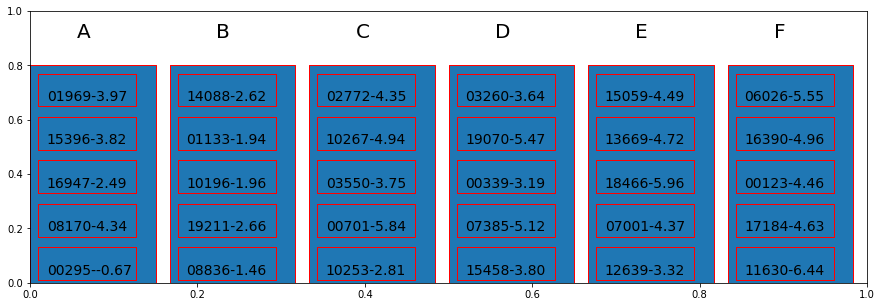

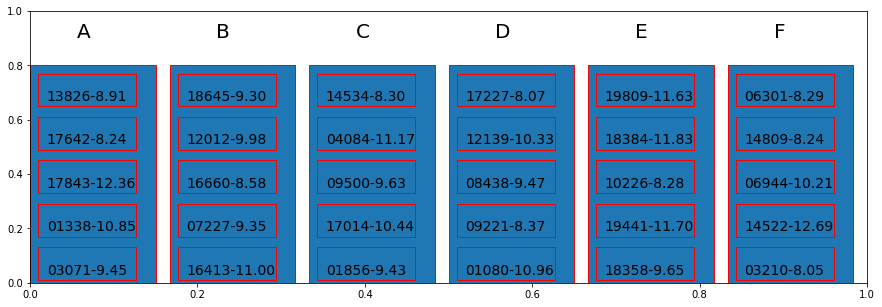

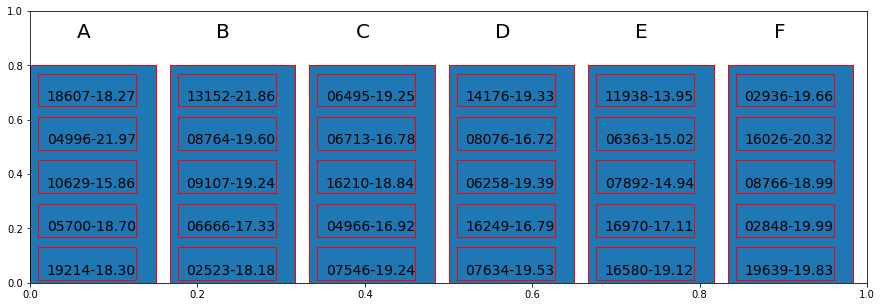

In [2]:
containers_transito = gera_containers_transito()
containers_agendados = gera_agendamento_containers(containers_transito)
patio = Patio()
gerente = GerenteRemocao(patio)
qtde = 0
for dia, containers in containers_agendados.items():
    for c in containers:
        qtde += 1
        containers_transito.pop(containers_transito.index(c))
    gerente.processa_fila_gatein(containers, mode='like')
print(qtde)
plot_patio(patio)
plot_patio(patio, '0013')
plot_patio(patio, '0040')

In [3]:
for pilha in gerente._patio._pilhas.values():
    print(pilha._nome, pilha.time_mean())

0001 3.8789786784757854
0002 7.029255241230658
0003 7.169821802726511
0004 7.9389161733767475
0005 7.425118844369437
0006 8.560671354388353
0007 9.08213549541309
0008 9.55394845408236
0009 10.510405007619173
0010 10.153323412628373
0011 10.62627787712858
0012 10.543363413626713
0013 9.824491407100195
0014 11.04498097513162
0015 10.8257385423568
0016 11.354083111468583
0017 12.100387785833847
0018 12.156767496987701
0019 12.485439031444422
0020 12.763076479879588
0021 12.892011395019601
0022 12.796775284641031
0023 14.4426219592489
0024 14.301828307432286
0025 14.730595792897738
0026 13.797431621311611
0027 15.34871744037883
0028 14.914613552778755
0029 15.082524980849144
0030 16.584960446705455
0031 16.523120595999053
0032 15.720871485540235
0033 16.096365708359183
0034 17.394488354642053
0035 17.095851281491083
0036 17.34227765667226
0037 18.16503273741971
0038 16.996910322500074
0039 18.030963754054387
0040 18.36754156699291
0041 18.524111713704244
0042 19.092486598007834
0043 19.275

In [35]:

def generate_env(perc_pre_load=.5):
    self.containers_transito = gera_containers_transito()
    self.containers_agendados = gera_agendamento_containers(containers_transito)
    self.pre_load = []
    qtde = 0
    len_containers = [len(containers) for containers in containers_agendados.values()]
    limit = sum(len_containers) * perc_pre_load
    for dia, containers in containers_agendados.items():
        for c in containers:
            pre_load.append(c)
            containers.pop(containers.index(c))
            containers_transito.pop(containers_transito.index(c))
            qtde += 1
            if qtde > limit:
                break
    return self.containers_transito, self.containers_agendados, self.pre_load

def monte_carlo(mode_in=None, mode_out=None, turns=100, tamanho_fila=10):
    totalgeral = 0
    totalgatein = totalgateout = 0
    for turn in range(turns):
        # GATE-IN
        fila_in = []
        for ccs_gate_in in range(tamanho_fila):
            totalgatein += 1
            random_ind = randint(0, len(containers_transito) - 1)
            cc_in = containers_transito.pop(random_ind)
            fila_in.append(cc_in)
            containers_agendados[int(cc_in.time_to_leave)].append(cc_in)

        gerente.processa_fila_gatein(fila_in, mode=mode_in)

        # GATE-OUT
        fila_out = []
        random_dia = randint(0, len(containers_agendados.keys()))
        containers_dentro = containers_agendados[random_dia]
        if containers_dentro:
            for ccs_gate_out in range(tamanho_fila):
                if len(containers_dentro) == 0:
                    if random_dia < 10:
                        random_dia +=1
                    else:
                        random_dia -=1
                    containers_dentro = containers_agendados.get(random_dia, [])
                    continue
                totalgateout += 1
                random_ind = randint(0, len(containers_dentro) - 1)
                fila_out.append(containers_dentro.pop(random_ind))
            totalremocoes = gerente.processa_fila_gateout(fila_out, mode=mode_out)
            containers_transito.extend(fila_out)
            totalgeral += totalremocoes
    print('Média de remoções: %s' % (totalgeral / (turn + 1)))
    print('Total gatein: %s gateout:%s' % (totalgatein, totalgateout))
    print('Média de remoções ponderada: %s' % (totalgeral / totalgateout))
    return totalgeral / turns, totalgeral /totalgateout

In [36]:
def generate_env(perc_pre_load=.5):
    containers_transito = gera_containers_transito()
    containers_agendados = gera_agendamento_containers(containers_transito)
    pre_load = []
    qtde = 0
    len_containers = [len(containers) for containers in containers_agendados.values()]
    limit = sum(len_containers) * perc_pre_load
    for dia, containers in containers_agendados.items():
        for c in containers:
            pre_load.append(c)
            containers.pop(containers.index(c))
            containers_transito.pop(containers_transito.index(c))
            qtde += 1
            if qtde > limit:
                break
    return containers_transito, containers_agendados, pre_load    

In [29]:
TURNS = 10
# Separando por tempo...
containers_transito, containers_agendados, pre_load = generate_env()
patio = Patio()
gerente = GerenteRemocao(patio)
_ = gerente.processa_fila_gatein(pre_load, mode='like')
print(len(containers_transito), len(pre_load))

18850 1149


In [30]:
monte_carlo(mode_in='like', mode_out=None, turns=TURNS, tamanho_fila=30)

Média de remoções: 29.0
Total gatein: 300 gateout:291
Média de remoções ponderada: 0.9965635738831615


(29.0, 291)

In [31]:
# Separando por tempo E ordenando fila...
containers_transito, containers_agendados, pre_load = generate_env()
patio = Patio()
gerente = GerenteRemocao(patio)
_ = gerente.processa_fila_gatein(pre_load, mode='like')
print(len(containers_transito), len(pre_load))
monte_carlo(mode_in='like', mode_out='ordered', turns=TURNS, tamanho_fila=30)

18852 1147
Média de remoções: 33.5
Total gatein: 300 gateout:261
Média de remoções ponderada: 1.2835249042145593


(33.5, 261)

In [32]:
# Separando por tempo E ordenando fila...
containers_transito, containers_agendados, pre_load = generate_env()
patio = Patio()
gerente = GerenteRemocao(patio)
_ = gerente.processa_fila_gatein(pre_load, mode='like')
print(len(containers_transito), len(pre_load))
monte_carlo(mode_in='like', mode_out='stay', turns=TURNS, tamanho_fila=30)

18850 1149
Média de remoções: 22.5
Total gatein: 300 gateout:263
Média de remoções ponderada: 0.8555133079847909


(22.5, 263)

In [33]:
# Separando por tempo E ordenando fila...
containers_transito, containers_agendados, pre_load = generate_env()
patio = Patio()
gerente = GerenteRemocao(patio)
_ = gerente.processa_fila_gatein(pre_load, mode='like')
print(len(containers_transito), len(pre_load))
monte_carlo(mode_in='like', mode_out='ordered+stay', turns=TURNS, tamanho_fila=30)

18843 1156
Média de remoções: 9.8
Total gatein: 300 gateout:173
Média de remoções ponderada: 0.5664739884393064


(9.8, 173)

In [34]:
# Sem otimizacao nenhuma...
containers_transito, containers_agendados, pre_load = generate_env()
pre_load = sample(pre_load, len(pre_load))
patio = Patio()
gerente = GerenteRemocao(patio)
gerente.processa_fila_gatein(pre_load, mode=None)
print(len(containers_transito), len(pre_load))
monte_carlo(turns=10, tamanho_fila=30)

18857 1142
Média de remoções: 55.6
Total gatein: 300 gateout:296
Média de remoções ponderada: 1.8783783783783783


(55.6, 296)

In [59]:
from copy import copy, deepcopy
from collections import defaultdict
from busca.utils.simulador import Simulador


results = defaultdict(list)
for perc in [.4]:
    simulador = Simulador()
    simulador.generate_env()
    for mode_in in ['nenhum', 'like']:
        for turns in [200]:
            for tamanho_fila in [20, 30, 50]:
                lsimulador = deepcopy(simulador)
                lsimulador.initialize_gerente()
                lsimulador.turns = turns
                lsimulador.tamanho_fila = tamanho_fila
                print(len(containers_transito), len(pre_load))
                print('Montando gerente com pre-load %s' % len(pre_load))
                media, media_ponderada = lsimulador.monte_carlo(mode_in=mode_in, turns=turns, tamanho_fila=tamanho_fila)
                results[mode_in].append((turns, tamanho_fila, media, media_ponderada))

AttributeError: 'Simulador' object has no attribute 'initialize_gerente'

In [54]:
print(results)

defaultdict(<class 'list'>, {'nenhum': [(200, 20, 121.77, 5.682221185254316), (200, 30, 98.62, 5.039345937659683), (200, 50, 113.48, 5.453147525228256)], 'like': [(200, 20, 96.37, 5.008835758835759), (200, 30, 112.77, 5.604870775347912), (200, 50, 112.43, 5.338556505223172)]})


In [55]:
y_none = [x[3] for x in results['nenhum']]
y_like = [x[3] for x in results['like']]
x = [x[1] for x in results['like']]

Text(0, 0.5, 'Tamanho da fila utilizada')

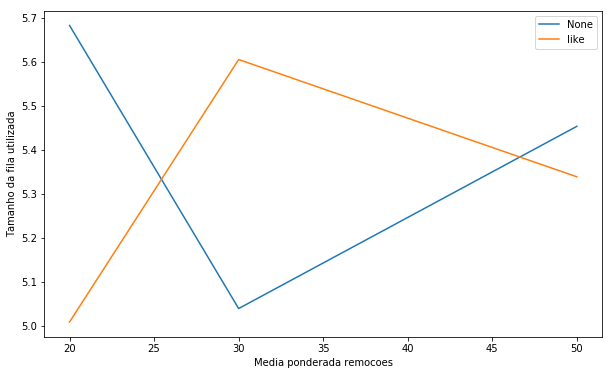

In [56]:

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
plt.plot(x, y_none, label='None')
plt.plot(x, y_like, label='like')
plt.legend()
plt.xlabel('Media ponderada remocoes')
plt.ylabel('Tamanho da fila utilizada')
